In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Factor-Hair-Revised.csv')

In [3]:
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
ProdQual,8.5,8.2,9.2,6.4,9.0
Ecom,3.9,2.7,3.4,3.3,3.4
TechSup,2.5,5.1,5.6,7.0,5.2
CompRes,5.9,7.2,5.6,3.7,4.6
Advertising,4.8,3.4,5.4,4.7,2.2
ProdLine,4.9,7.9,7.4,4.7,6.0
SalesFImage,6.0,3.1,5.8,4.5,4.5
ComPricing,6.8,5.3,4.5,8.8,6.8
WartyClaim,4.7,5.5,6.2,7.0,6.1


In [4]:
df.shape

(100, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.duplicated().sum()

0

In [8]:
df.dtypes

ID                int64
ProdQual        float64
Ecom            float64
TechSup         float64
CompRes         float64
Advertising     float64
ProdLine        float64
SalesFImage     float64
ComPricing      float64
WartyClaim      float64
OrdBilling      float64
DelSpeed        float64
Satisfaction    float64
dtype: object

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100.0,50.500,29.011492,1.0,25.750,50.50,75.250,100.0
ProdQual,100.0,7.810,1.396279,5.0,6.575,8.00,9.100,10.0
Ecom,100.0,3.672,0.700516,2.2,3.275,3.60,3.925,5.7
TechSup,100.0,5.365,1.530457,1.3,4.250,5.40,6.625,8.5
CompRes,100.0,5.442,1.208403,2.6,4.600,5.45,6.325,7.8
Advertising,100.0,4.010,1.126943,1.9,3.175,4.00,4.800,6.5
ProdLine,100.0,5.805,1.315285,2.3,4.700,5.75,6.800,8.4
SalesFImage,100.0,5.123,1.072320,2.9,4.500,4.90,5.800,8.2
ComPricing,100.0,6.974,1.545055,3.7,5.875,7.10,8.400,9.9
WartyClaim,100.0,6.043,0.819738,4.1,5.400,6.10,6.600,8.1


## 1: PCA: Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

Text(0.5, 1.0, 'CompRes Distribution')

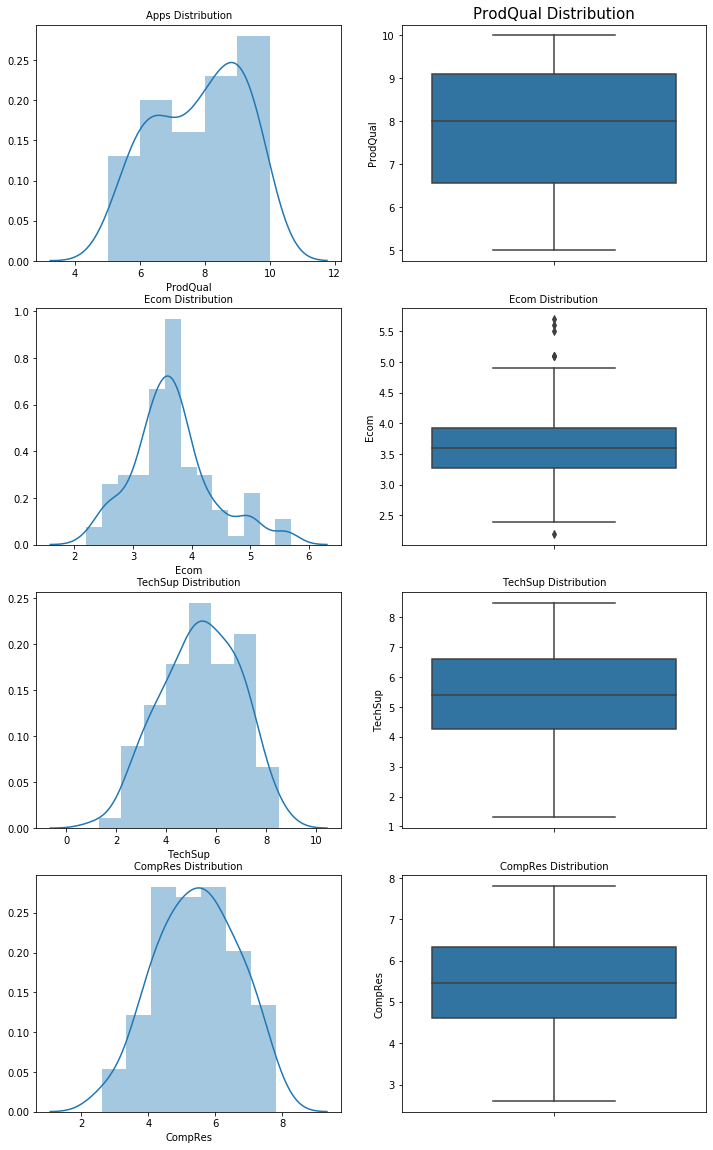

In [10]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)

a = sns.distplot(df['ProdQual'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=10)
a = sns.boxplot(df['ProdQual'] , orient = "v" , ax=axes[0][1])
a.set_title("ProdQual Distribution",fontsize=15)

a = sns.distplot(df['Ecom'] , ax=axes[1][0])
a.set_title("Ecom Distribution",fontsize=10)

a = sns.boxplot(df['Ecom'] , orient = "v" , ax=axes[1][1])
a.set_title("Ecom Distribution",fontsize=10)

a = sns.distplot(df['TechSup'] , ax=axes[2][0])
a.set_title("TechSup Distribution",fontsize=10)

a = sns.boxplot(df['TechSup'] , orient = "v" , ax=axes[2][1])
a.set_title("TechSup Distribution",fontsize=10)

a = sns.distplot(df['CompRes'] , ax=axes[3][0])
a.set_title("CompRes Distribution",fontsize=10)

a = sns.boxplot(df['CompRes'] , orient = "v" , ax=axes[3][1])
a.set_title("CompRes Distribution",fontsize=10)

Text(0.5, 1.0, 'ComPricing Distribution')

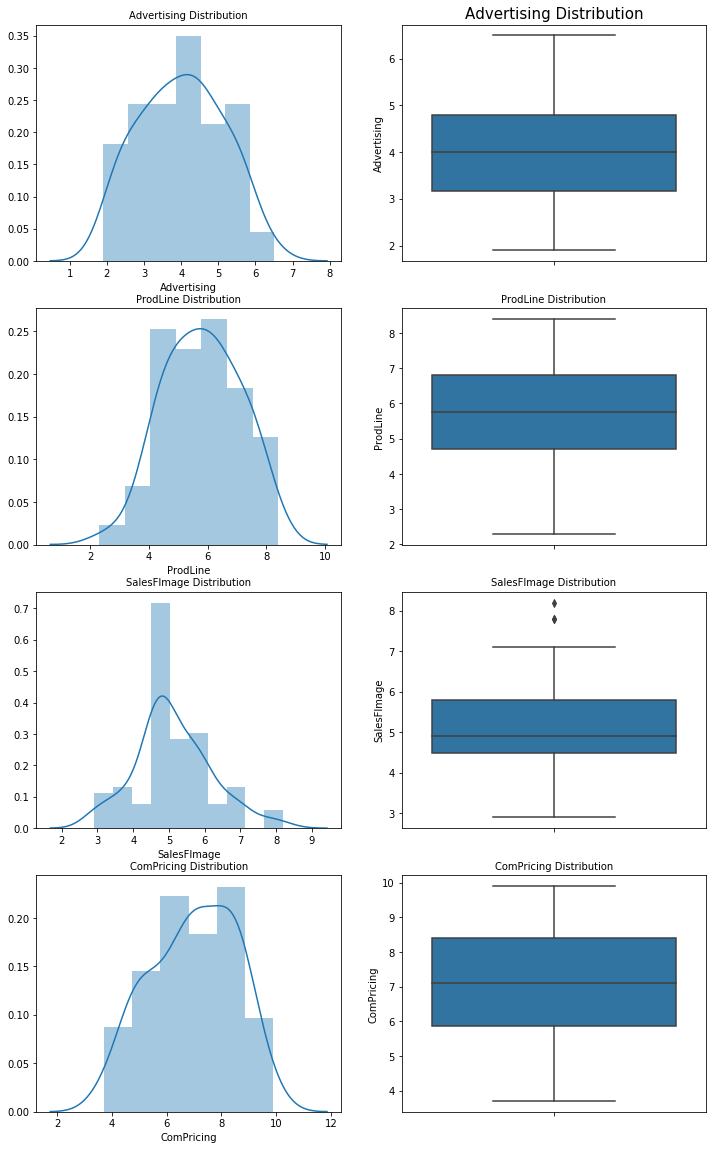

In [11]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['Advertising'] , ax=axes[0][0])
a.set_title("Advertising Distribution",fontsize=10)

a = sns.boxplot(df['Advertising'] , orient = "v" , ax=axes[0][1])
a.set_title("Advertising Distribution",fontsize=15)

a = sns.distplot(df['ProdLine'] , ax=axes[1][0])
a.set_title("ProdLine Distribution",fontsize=10)

a = sns.boxplot(df['ProdLine'] , orient = "v" , ax=axes[1][1])
a.set_title("ProdLine Distribution",fontsize=10)

a = sns.distplot(df['SalesFImage'] , ax=axes[2][0])
a.set_title("SalesFImage Distribution",fontsize=10)

a = sns.boxplot(df['SalesFImage'] , orient = "v" , ax=axes[2][1])
a.set_title("SalesFImage Distribution",fontsize=10)

a = sns.distplot(df['ComPricing'] , ax=axes[3][0])
a.set_title("ComPricing Distribution",fontsize=10)

a = sns.boxplot(df['ComPricing'] , orient = "v" , ax=axes[3][1])
a.set_title("ComPricing Distribution",fontsize=10)

Text(0.5, 1.0, 'Satisfaction Distribution')

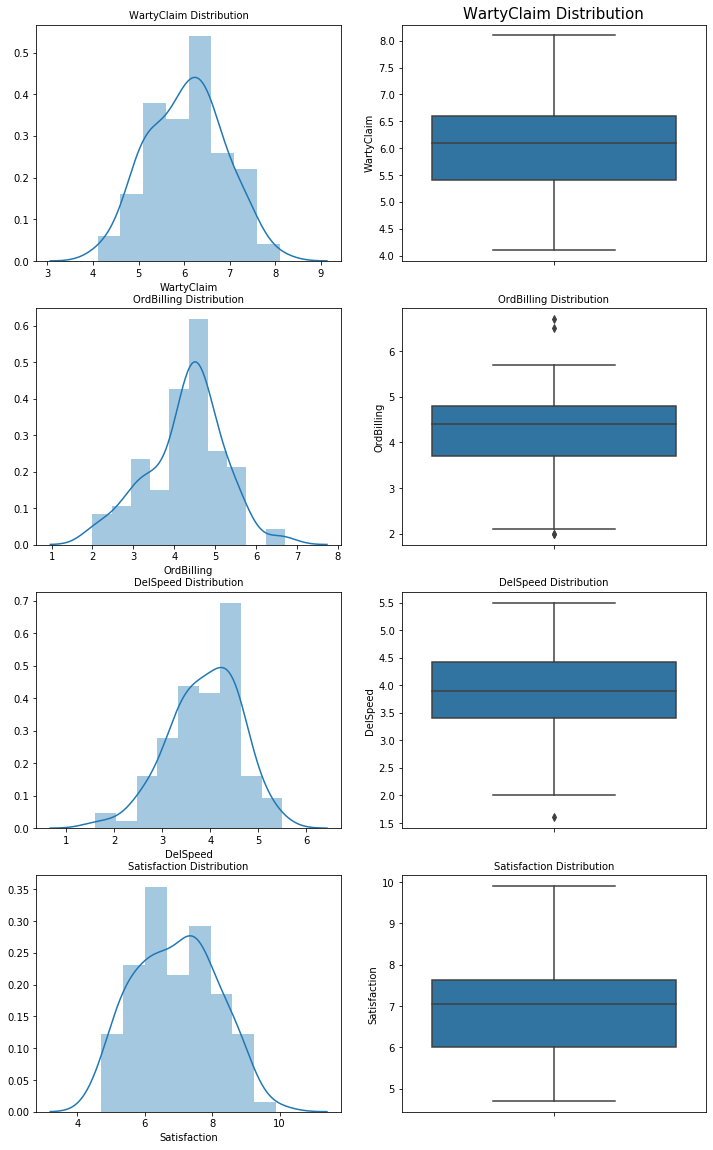

In [12]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df['WartyClaim'] , ax=axes[0][0])
a.set_title("WartyClaim Distribution",fontsize=10)

a = sns.boxplot(df['WartyClaim'] , orient = "v" , ax=axes[0][1])
a.set_title("WartyClaim Distribution",fontsize=15)

a = sns.distplot(df['OrdBilling'] , ax=axes[1][0])
a.set_title("OrdBilling Distribution",fontsize=10)

a = sns.boxplot(df['OrdBilling'] , orient = "v" , ax=axes[1][1])
a.set_title("OrdBilling Distribution",fontsize=10)

a = sns.distplot(df['DelSpeed'] , ax=axes[2][0])
a.set_title("DelSpeed Distribution",fontsize=10)

a = sns.boxplot(df['DelSpeed'] , orient = "v" , ax=axes[2][1])
a.set_title("DelSpeed Distribution",fontsize=10)

a = sns.distplot(df['Satisfaction'] , ax=axes[3][0])
a.set_title("Satisfaction Distribution",fontsize=10)

a = sns.boxplot(df['Satisfaction'] , orient = "v" , ax=axes[3][1])
a.set_title("Satisfaction Distribution",fontsize=10)

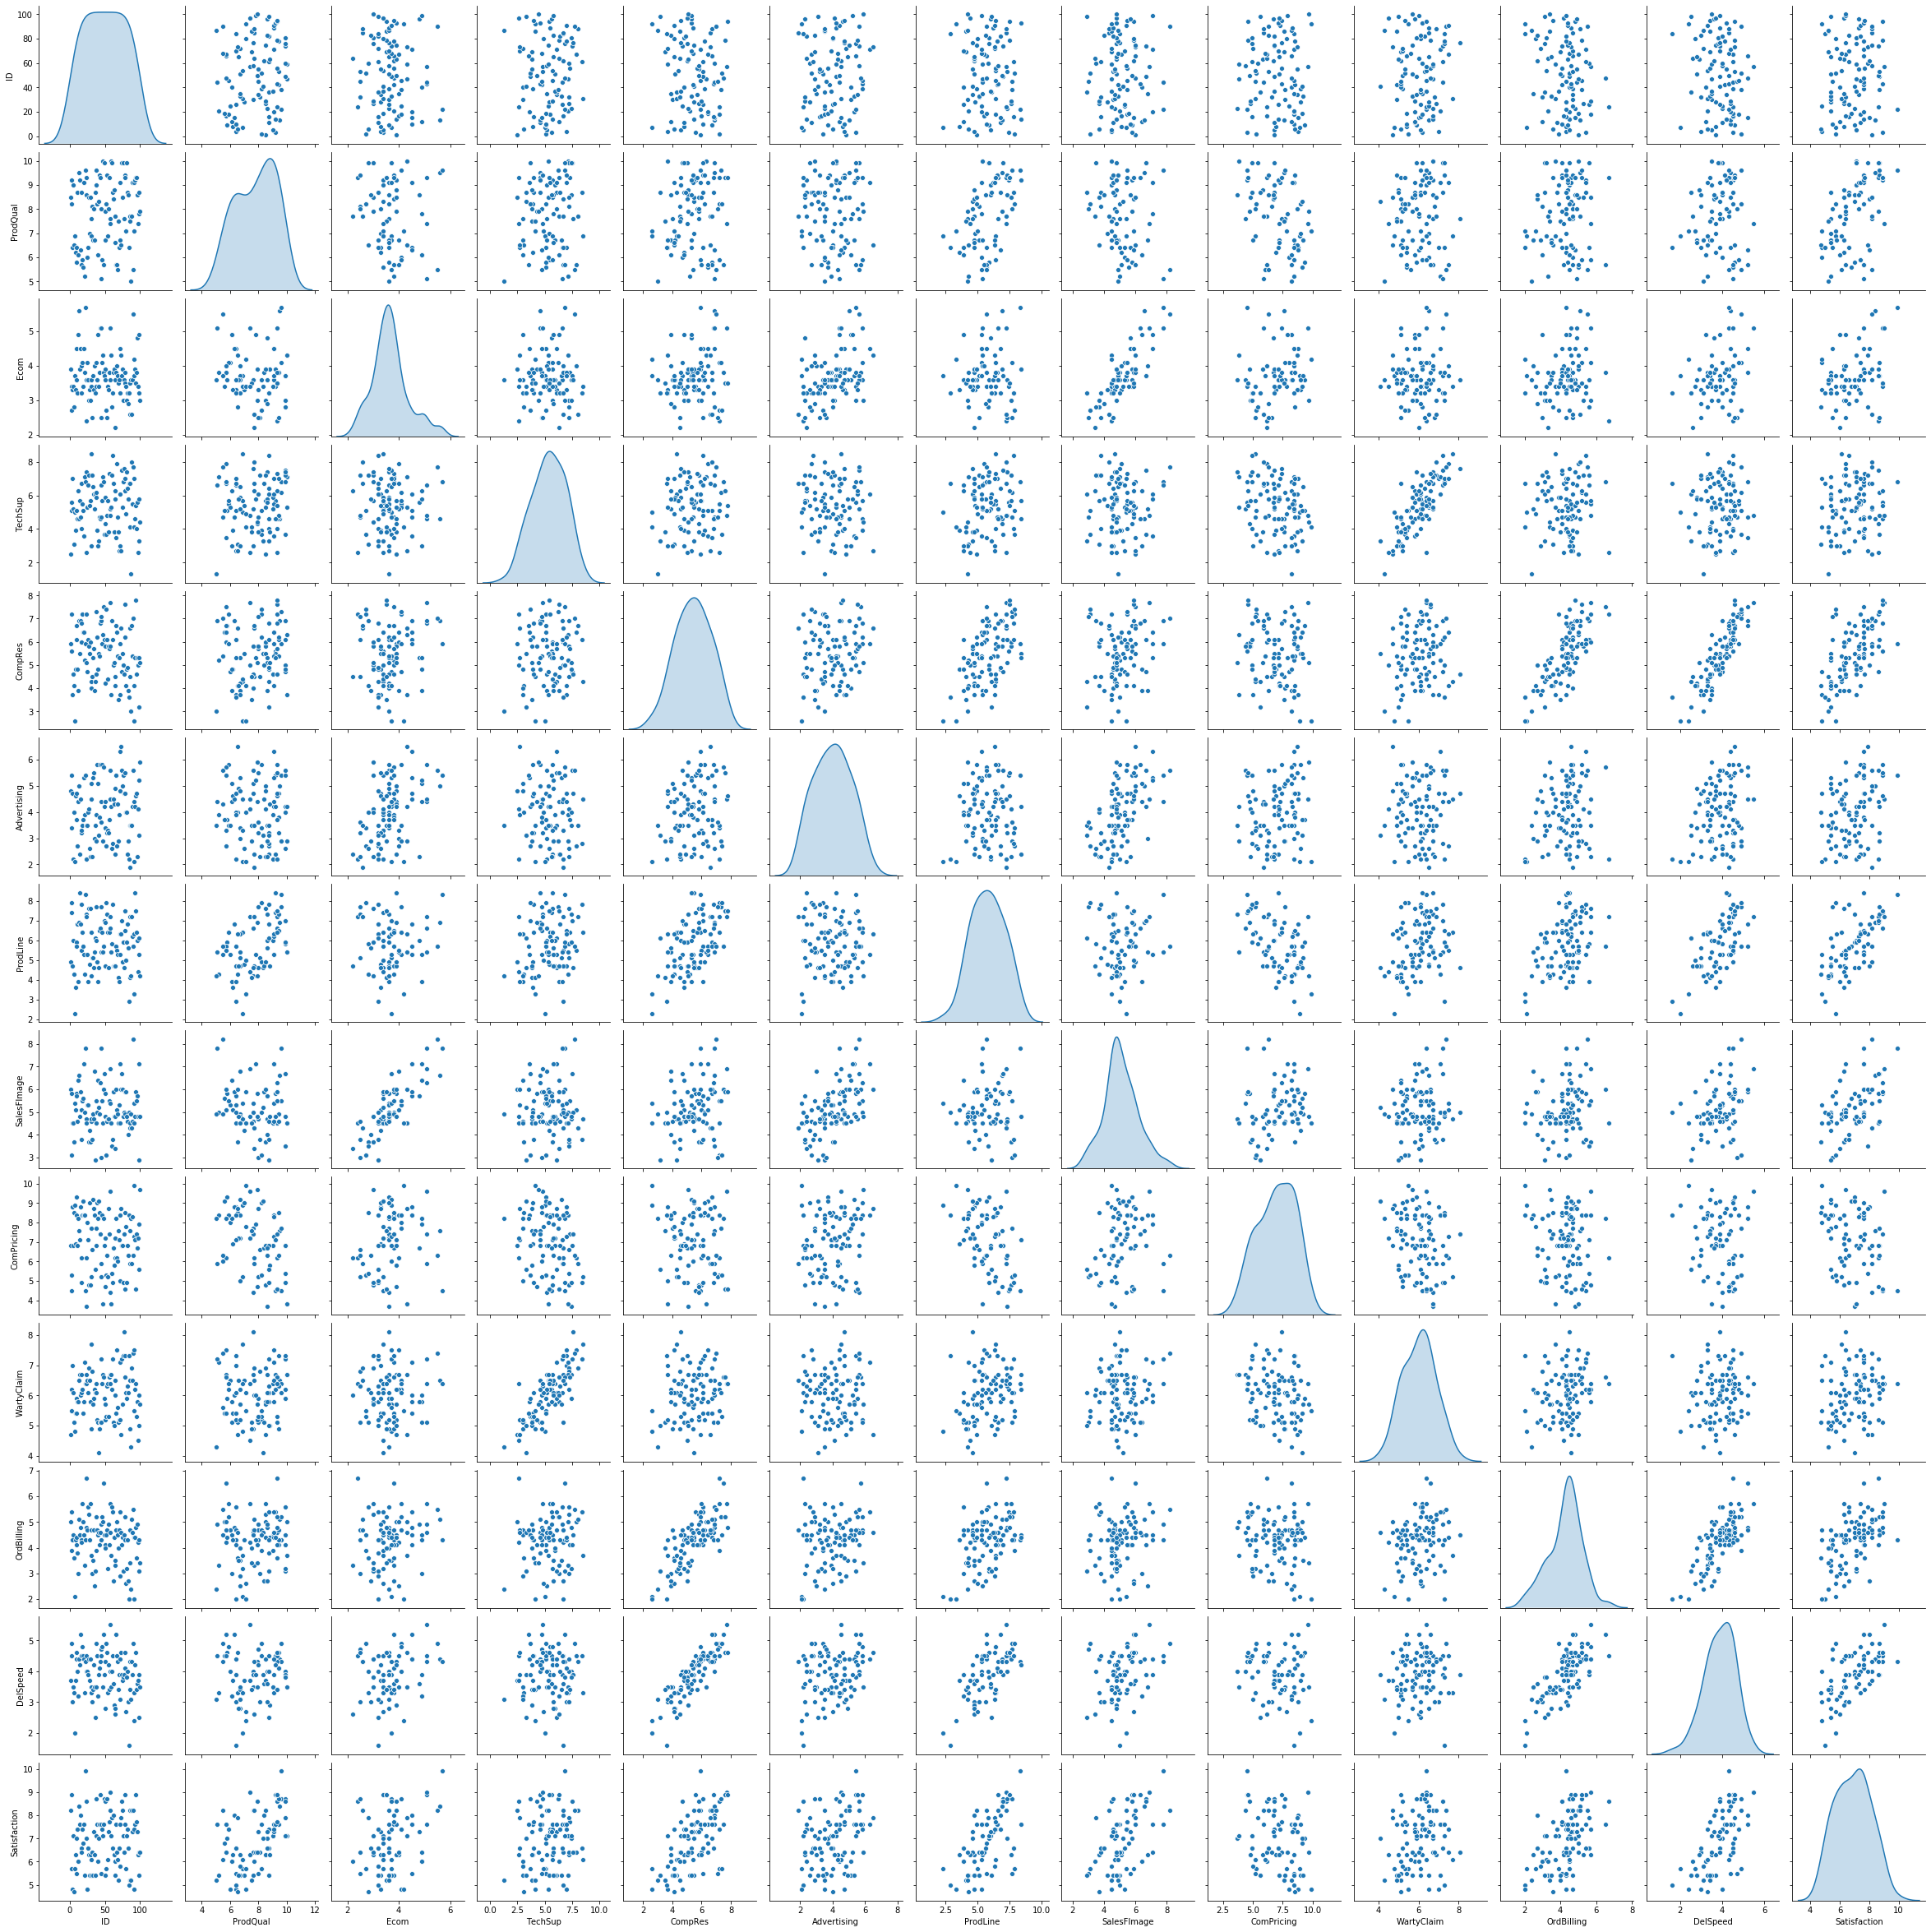

In [13]:
sns.pairplot(df, diag_kind='kde')

In [14]:
df_1 = df.corr()
df_1

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.145774,-0.046173,0.031838,-0.144322,0.073129,-0.048641,0.013848,-0.063007,0.058592,-0.178352,-0.172134,0.061143
ProdQual,0.145774,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.046173,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.031838,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,-0.144322,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,0.073129,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,-0.048641,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,0.013848,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.063007,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.058592,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545


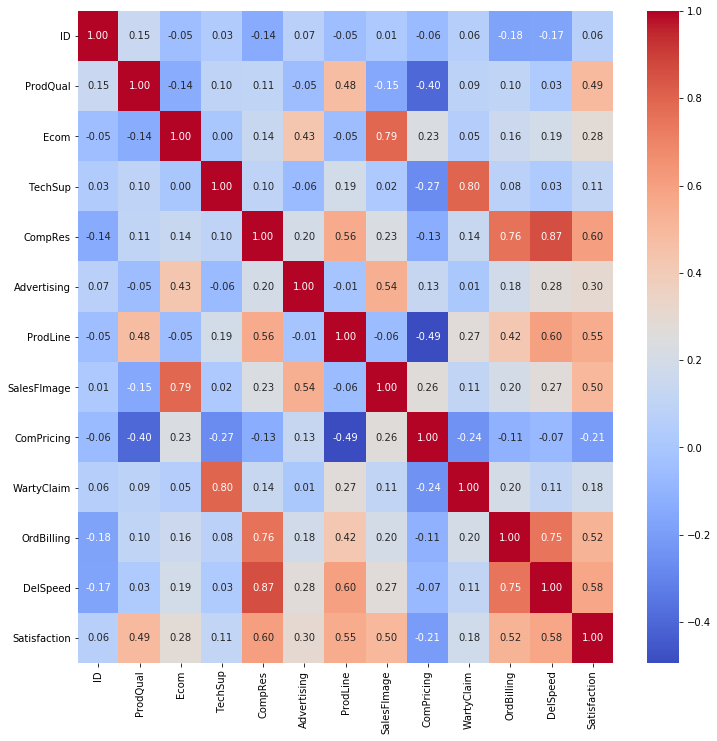

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(df_1, annot=True, fmt = '.2f', cmap='coolwarm')

##  Scale the variables and write the inference for using the type of scaling function for this case study.

In [16]:
from scipy.stats import zscore
df_z=df_1.apply(zscore)
df_z.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,3.267326,0.024327,-0.871462,-0.392785,-1.346983,-0.561875,-0.822820,-0.835929,-0.094022,-0.486071,-1.445014,-1.415414,-1.092440
ProdQual,0.309832,2.551389,-1.154764,-0.201528,-0.650279,-1.007894,0.568633,-1.344457,-1.015574,-0.392407,-0.614934,-0.865680,0.353982
Ecom,-0.354728,-0.812690,2.385863,-0.485685,-0.556319,0.694993,-0.833523,1.551357,0.702743,-0.507168,-0.462682,-0.414789,-0.338575
TechSup,-0.084637,-0.124103,-0.724999,2.511251,-0.677274,-1.040999,-0.184749,-0.826283,-0.660070,1.841586,-0.686006,-0.871944,-0.917398
CompRes,-0.694539,-0.092244,-0.291241,-0.198360,1.833226,-0.125772,0.790583,-0.173171,-0.270956,-0.228224,1.301468,1.437691,0.751790


## Comment on the comparison between covariance and the correlation matrix after scaling.

In [17]:
cov_matrix = np.cov(df_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.08333333  0.16431058 -0.28167456 -0.01491226 -0.61421433 -0.1458407
  -0.2993611  -0.25833507 -0.09508199 -0.05604405 -0.6507194  -0.64813016
  -0.34302053]
 [ 0.16431058  1.08333333 -0.59924028  0.18527598  0.17526336 -0.45334117
   0.73363553 -0.59000064 -0.84108305  0.16344309  0.1372034   0.07829383
   0.5656554 ]
 [-0.28167456 -0.59924028  1.08333333 -0.38070984 -0.06649372  0.74355411
  -0.48232701  1.02949924  0.54782984 -0.34037823 -0.0411966   0.02818671
   0.06224819]
 [-0.01491226  0.18527598 -0.38070984  1.08333333 -0.08645936 -0.49848098
   0.25833946 -0.39578872 -0.58758338  1.04498766 -0.06358128 -0.17708731
  -0.10797743]
 [-0.61421433  0.17526336 -0.06649372 -0.08645936  1.08333333  0.05453615
   0.78998588  0.01827955 -0.41507786 -0.00965497  1.03265931  1.0625731
   0.81794992]
 [-0.1458407  -0.45334117  0.74355411 -0.49848098  0.05453615  1.08333333
  -0.35322008  0.82303589  0.40293002 -0.44392594  0.05701344  0.16080765
   0.15899099]
 [

In [18]:
df_z1 = df_z.corr()
df_z1

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.151671,-0.260007,-0.013765,-0.566967,-0.134622,-0.276333,-0.238463,-0.087768,-0.051733,-0.600664,-0.598274,-0.316634
ProdQual,0.151671,1.000000,-0.553145,0.171024,0.161782,-0.418469,0.677202,-0.544616,-0.776384,0.150871,0.126649,0.072271,0.522143
Ecom,-0.260007,-0.553145,1.000000,-0.351424,-0.061379,0.686358,-0.445225,0.950307,0.505689,-0.314195,-0.038028,0.026018,0.057460
TechSup,-0.013765,0.171024,-0.351424,1.000000,-0.079809,-0.460136,0.238467,-0.365343,-0.542385,0.964604,-0.058690,-0.163465,-0.099671
CompRes,-0.566967,0.161782,-0.061379,-0.079809,1.000000,0.050341,0.729218,0.016873,-0.383149,-0.008912,0.953224,0.980837,0.755031
Advertising,-0.134622,-0.418469,0.686358,-0.460136,0.050341,1.000000,-0.326049,0.759725,0.371935,-0.409778,0.052628,0.148438,0.146761
ProdLine,-0.276333,0.677202,-0.445225,0.238467,0.729218,-0.326049,1.000000,-0.417133,-0.836383,0.288942,0.659957,0.682621,0.731866
SalesFImage,-0.238463,-0.544616,0.950307,-0.365343,0.016873,0.759725,-0.417133,1.000000,0.497473,-0.313512,0.023189,0.099913,0.179570
ComPricing,-0.087768,-0.776384,0.505689,-0.542385,-0.383149,0.371935,-0.836383,0.497473,1.000000,-0.558066,-0.351796,-0.296766,-0.542773
WartyClaim,-0.051733,0.150871,-0.314195,0.964604,-0.008912,-0.409778,0.288942,-0.313512,-0.558066,1.000000,0.031974,-0.079859,-0.035075


## Check the dataset for outliers before and after scaling. Draw your inferences from this exercise

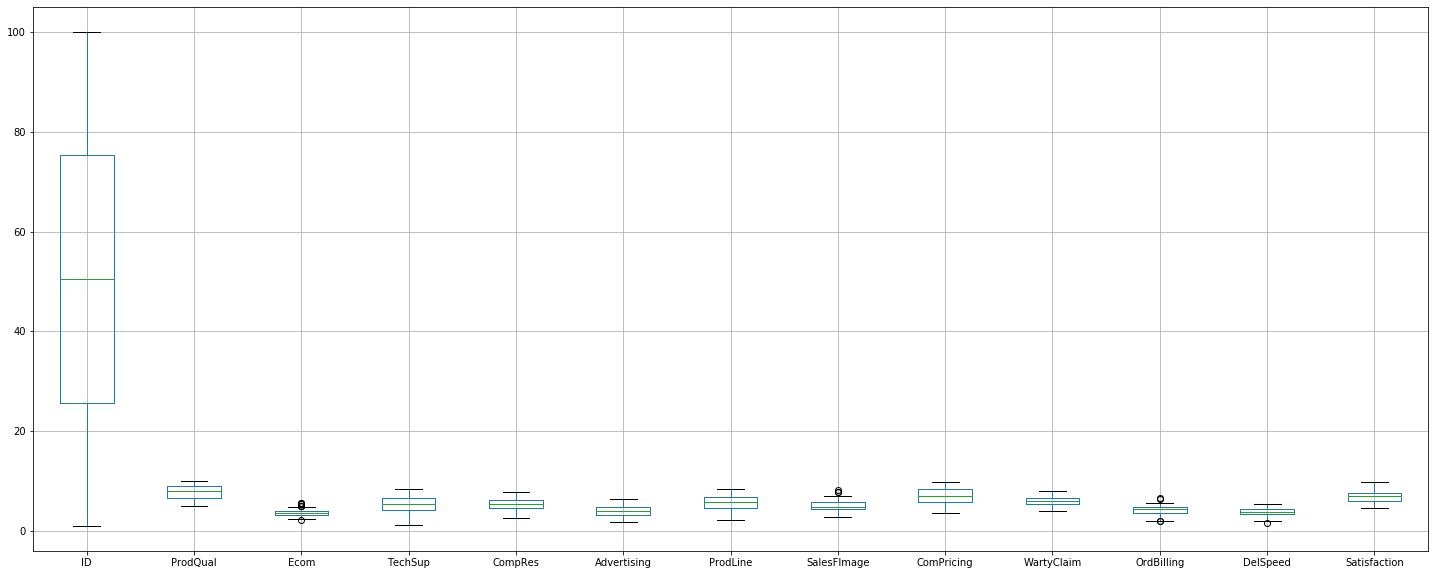

In [19]:
df.boxplot(figsize=(25,10))

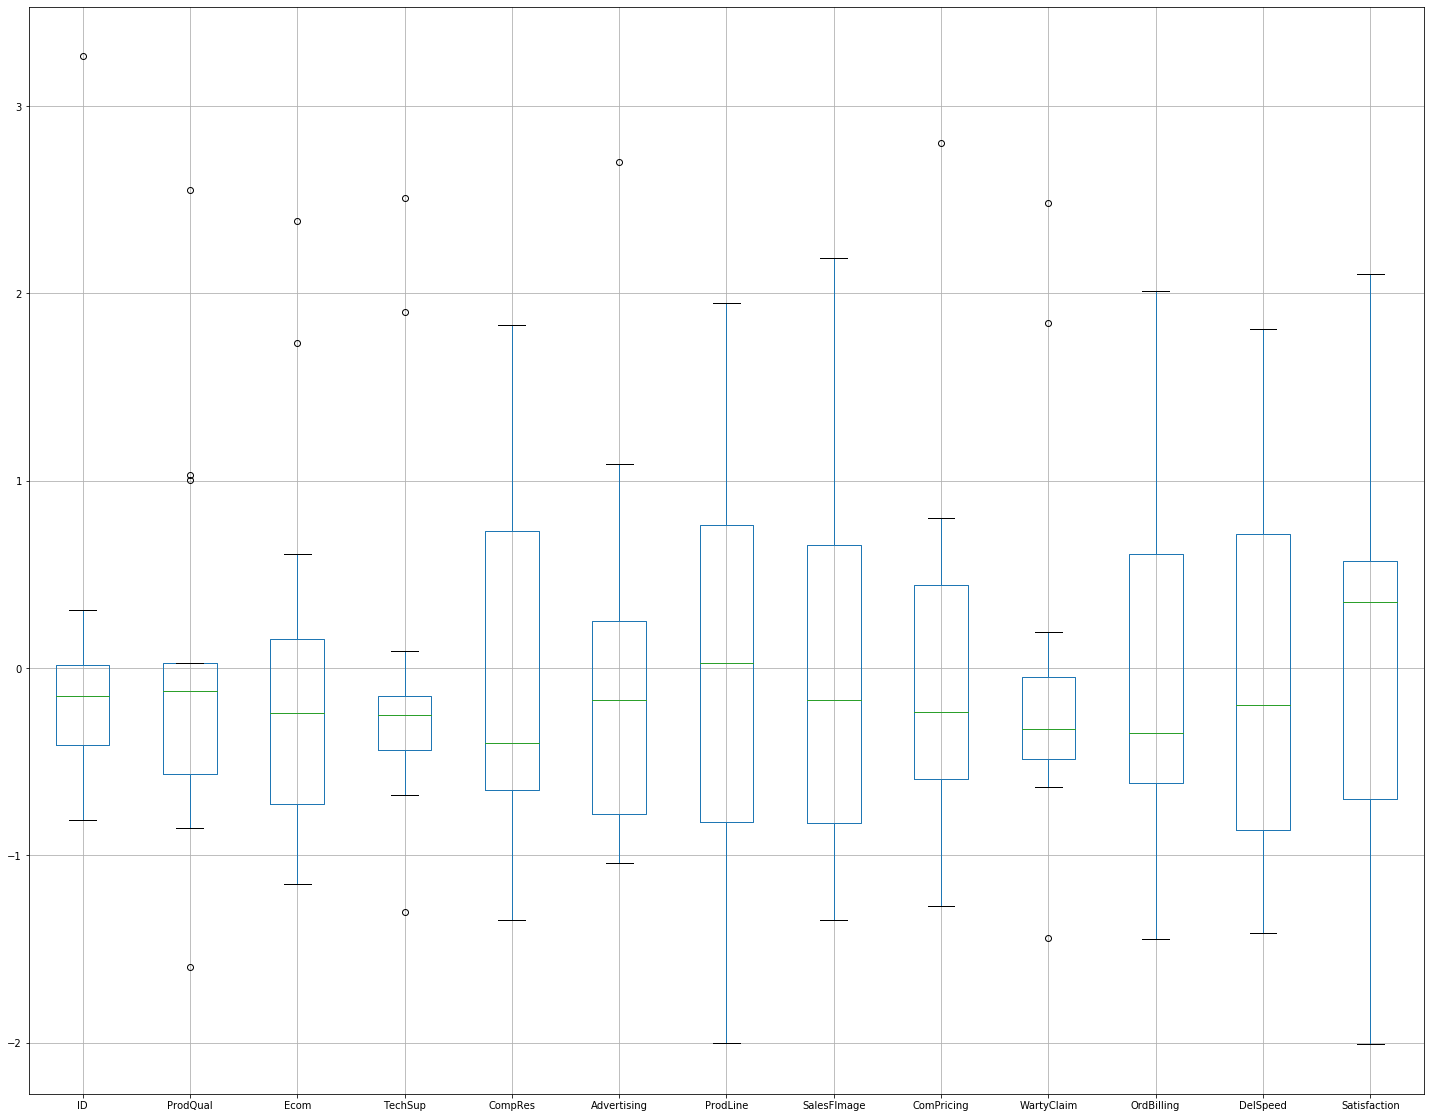

In [20]:
df_z.boxplot(figsize=(25,20))

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [61]:
lratio,uratio=remove_outlier(df['ProdQual'])
df['ProdQual']=np.where(df['ProdQual']>uratio,uratio,df['ProdQual'])
df['ProdQual']=np.where(df['ProdQual']<lratio,lratio,df['ProdQual'])

lratio,uratio=remove_outlier(df['Ecom'])
df['Ecom']=np.where(df['Ecom']>uratio,uratio,df['Ecom'])
df['Ecom']=np.where(df['Ecom']<lratio,lratio,df['Ecom'])

lratio,uratio=remove_outlier(df['TechSup'])
df['TechSup']=np.where(df['TechSup']>uratio,uratio,df['TechSup'])
df['TechSup']=np.where(df['TechSup']<lratio,lratio,df['TechSup'])

lratio,uratio=remove_outlier(df['CompRes'])
df['CompRes']=np.where(df['CompRes']>uratio,uratio,df['CompRes'])
df['CompRes']=np.whereCompRes(df['CompRes']<lratio,lratio,df['CompRes'])

lratio,uratio=remove_outlier(df['Advertising'])
df['Advertising']=np.where(df['Advertising']>uratio,uratio,df['Advertising'])
df['Advertising']=np.where(df['Advertising']<lratio,lratio,df['Advertising'])

lratio,uratio=remove_outlier(df['ProdLine'])
df['ProdLine']=np.where(df['ProdLine']>uratio,uratio,df['ProdLine'])
df['ProdLine']=np.where(df['ProdLine']<lratio,lratio,df['ProdLine'])

lratio,uratio=remove_outlier(df['SalesFImage'])
df['SalesFImage']=np.where(df['SalesFImage']>uratio,uratio,df['SalesFImage'])
df['SalesFImage']=np.where(df['SalesFImage']<lratio,lratio,df['SalesFImage'])

lratio,uratio=remove_outlier(df['ComPricing'])
df['ComPricing']=np.where(df['ComPricing']>uratio,uratio,df['ComPricing'])
df['ComPricing']=np.where(df['ComPricing']<lratio,lratio,df['ComPricing'])

lratio,uratio=remove_outlier(df['WartyClaim'])
df['WartyClaim']=np.where(df['WartyClaim']>uratio,uratio,df['WartyClaim'])
df['WartyClaim']=np.where(df['WartyClaim']<lratio,lratio,df['WartyClaim'])

lratio,uratio=remove_outlier(df['OrdBilling'])
df['OrdBilling']=np.where(df['OrdBilling']>uratio,uratio,df['OrdBilling'])
df['OrdBilling']=np.where(df['OrdBilling']<lratio,lratio,df['OrdBilling'])

lratio,uratio=remove_outlier(df['DelSpeed'])
df['DelSpeed']=np.where(df['DelSpeed']>uratio,uratio,df['DelSpeed'])
df['DelSpeed']=np.where(df['DelSpeed']<lratio,lratio,df['DelSpeed'])

lratio,uratio=remove_outlier(df['Satisfaction'])
df['Satisfaction']=np.where(df['Satisfaction']>uratio,uratio,df['Satisfaction'])
df['Satisfaction']=np.where(df['Satisfaction']<lratio,lratio,df['Satisfaction'])



AttributeError: module 'numpy' has no attribute 'whereCompRes'

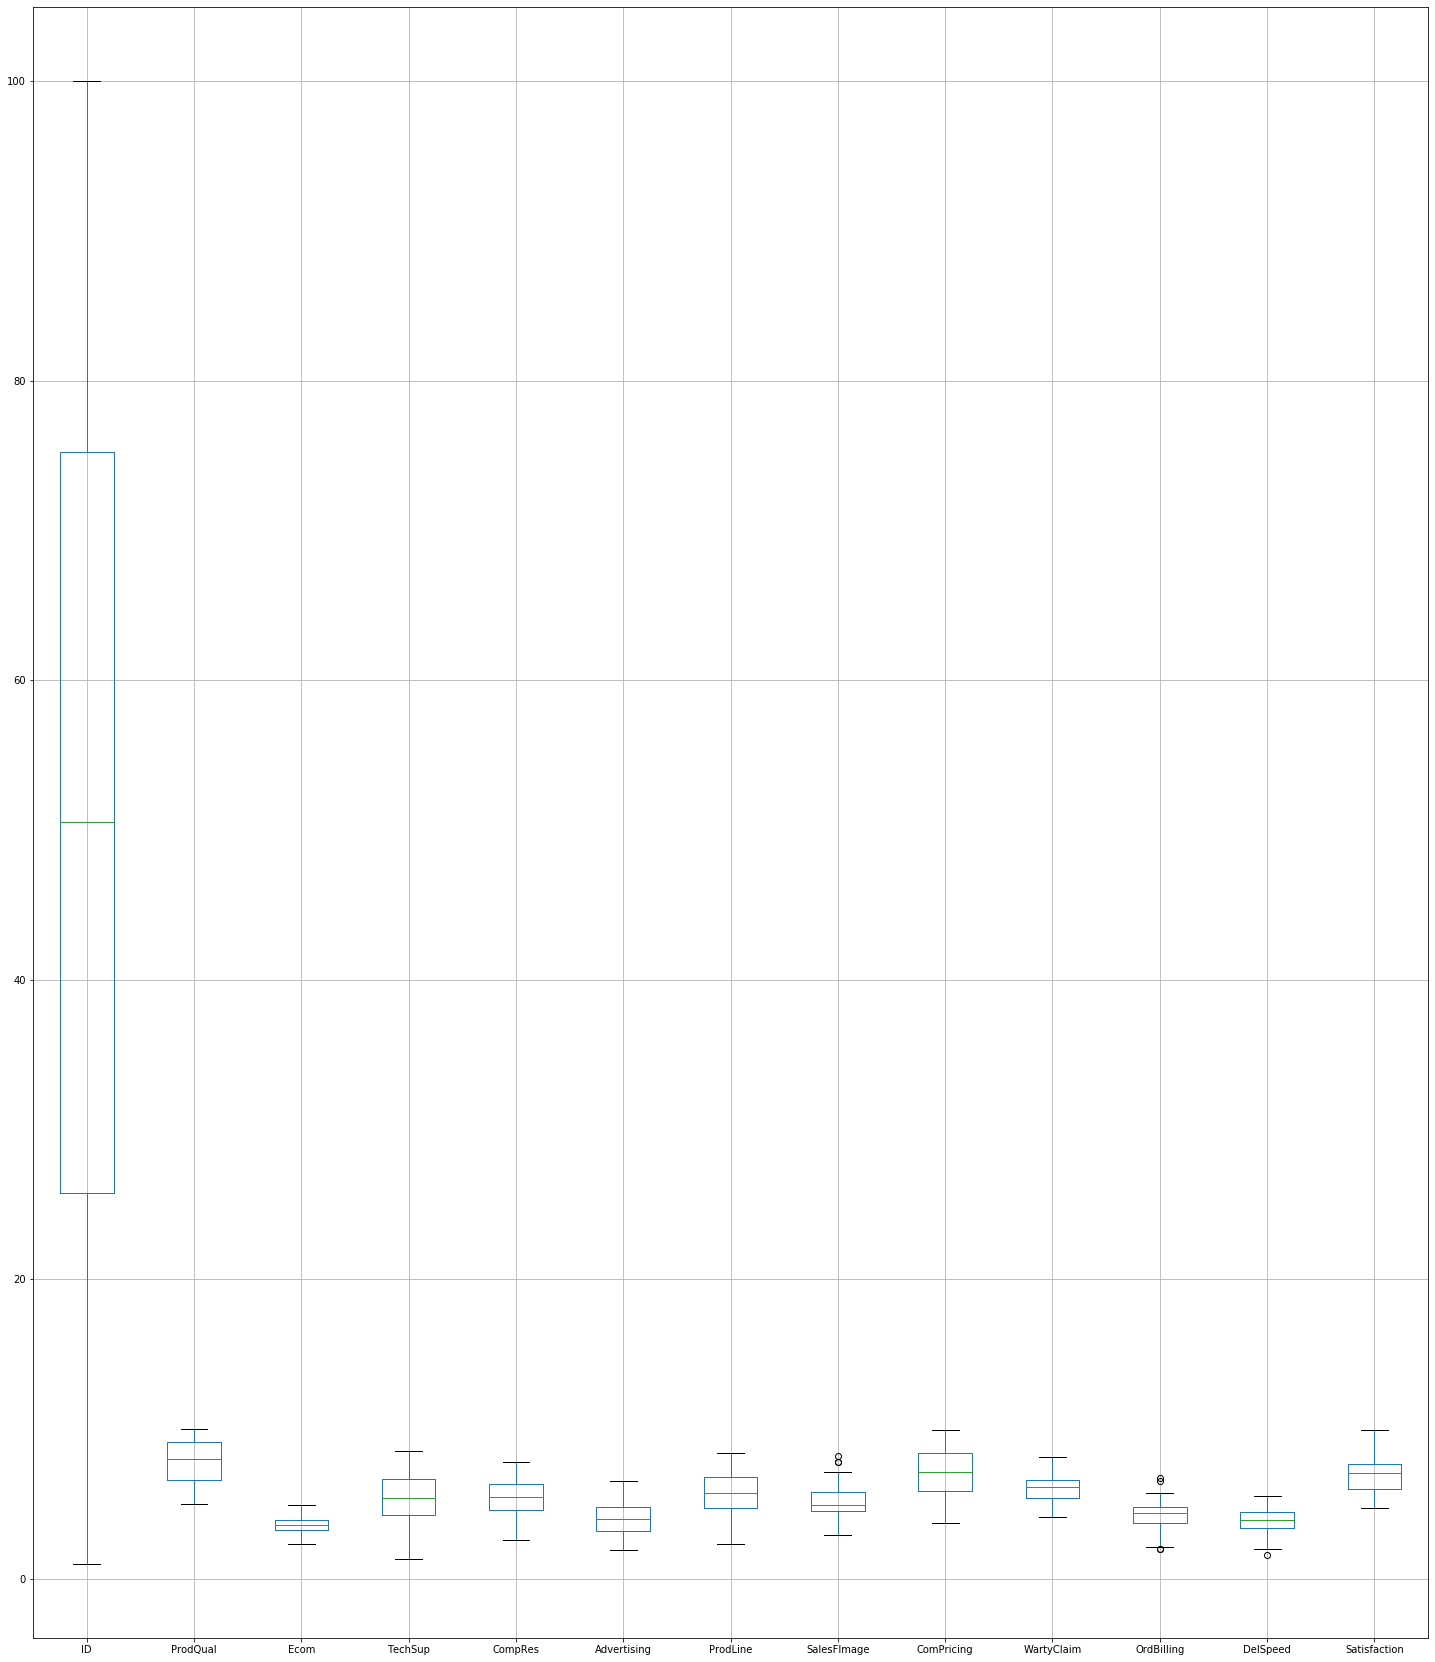

In [23]:
plt.subplots(figsize=(25,30))
df.boxplot(figsize=(25,20))

## Build the covariance matrix, eigenvalues, and eigenvector.

In [25]:
from scipy.stats import zscore
df_z=df_1.apply(zscore)
df_z.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,3.267326,0.024327,-0.871462,-0.392785,-1.346983,-0.561875,-0.822820,-0.835929,-0.094022,-0.486071,-1.445014,-1.415414,-1.092440
ProdQual,0.309832,2.551389,-1.154764,-0.201528,-0.650279,-1.007894,0.568633,-1.344457,-1.015574,-0.392407,-0.614934,-0.865680,0.353982
Ecom,-0.354728,-0.812690,2.385863,-0.485685,-0.556319,0.694993,-0.833523,1.551357,0.702743,-0.507168,-0.462682,-0.414789,-0.338575
TechSup,-0.084637,-0.124103,-0.724999,2.511251,-0.677274,-1.040999,-0.184749,-0.826283,-0.660070,1.841586,-0.686006,-0.871944,-0.917398
CompRes,-0.694539,-0.092244,-0.291241,-0.198360,1.833226,-0.125772,0.790583,-0.173171,-0.270956,-0.228224,1.301468,1.437691,0.751790


In [26]:
df_z.T

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,3.267326,0.309832,-0.354728,-0.084637,-0.694539,0.058321,-0.363271,-0.146922,-0.413009,0.007991,-0.812356,-0.790828,0.016822
ProdQual,0.024327,2.551389,-0.812690,-0.124103,-0.092244,-0.565109,1.005654,-0.856028,-1.594034,-0.145664,-0.098358,-0.324920,1.031780
Ecom,-0.871462,-1.154764,2.385863,-0.724999,-0.291241,0.610793,-0.891745,1.736822,-0.013253,-0.566110,-0.241524,-0.131027,0.152646
TechSup,-0.392785,-0.201528,-0.485685,2.511251,-0.198360,-0.676866,0.089502,-0.437321,-1.300519,1.902849,-0.248017,-0.411975,-0.150546
CompRes,-1.346983,-0.650279,-0.556319,-0.677274,1.833226,-0.398638,0.614351,-0.307386,-1.301494,-0.555683,1.157535,1.458300,0.730645
Advertising,-0.561875,-1.007894,0.694993,-1.040999,-0.125772,2.703484,-0.860202,1.090671,-0.346664,-0.781488,-0.170448,0.152355,0.253840
ProdLine,-0.822820,0.568633,-0.833523,-0.184749,0.790583,-0.724729,1.950492,-0.856340,-2.003157,0.028020,0.428240,0.897516,0.761833
SalesFImage,-0.835929,-1.344457,1.551357,-0.826283,-0.173171,0.785960,-1.066658,2.191253,-0.066209,-0.548584,-0.279457,-0.044860,0.657038
ComPricing,-0.094022,-1.015574,0.702743,-0.660070,-0.270956,0.443268,-1.270747,0.798458,2.801895,-0.589783,-0.234486,-0.120897,-0.489828
WartyClaim,-0.486071,-0.392407,-0.507168,1.841586,-0.228224,-0.636716,0.189889,-0.332077,-1.442813,2.480821,-0.049667,-0.325965,-0.111187


In [27]:
cov_matrix = np.cov(df_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.08333333  0.16431058 -0.28167456 -0.01491226 -0.61421433 -0.1458407
  -0.2993611  -0.25833507 -0.09508199 -0.05604405 -0.6507194  -0.64813016
  -0.34302053]
 [ 0.16431058  1.08333333 -0.59924028  0.18527598  0.17526336 -0.45334117
   0.73363553 -0.59000064 -0.84108305  0.16344309  0.1372034   0.07829383
   0.5656554 ]
 [-0.28167456 -0.59924028  1.08333333 -0.38070984 -0.06649372  0.74355411
  -0.48232701  1.02949924  0.54782984 -0.34037823 -0.0411966   0.02818671
   0.06224819]
 [-0.01491226  0.18527598 -0.38070984  1.08333333 -0.08645936 -0.49848098
   0.25833946 -0.39578872 -0.58758338  1.04498766 -0.06358128 -0.17708731
  -0.10797743]
 [-0.61421433  0.17526336 -0.06649372 -0.08645936  1.08333333  0.05453615
   0.78998588  0.01827955 -0.41507786 -0.00965497  1.03265931  1.0625731
   0.81794992]
 [-0.1458407  -0.45334117  0.74355411 -0.49848098  0.05453615  1.08333333
  -0.35322008  0.82303589  0.40293002 -0.44392594  0.05701344  0.16080765
   0.15899099]
 [

In [62]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.14698312  0.27939297 -0.3359838   0.32931577  0.68396656 -0.37761264
  -0.03209649  0.02739546 -0.01512499  0.21832297  0.03949345  0.13137223
   0.01035332]
 [-0.28306547  0.19146419 -0.34911782  0.34062251 -0.44142565  0.15443336
  -0.17874148  0.24044397  0.05442635  0.38729774  0.32727907  0.0539094
   0.27177342]
 [ 0.21549302 -0.34363038  0.22133631  0.31825636 -0.21483847 -0.31613293
   0.44598189  0.32578388  0.09239396  0.03205052  0.13730178  0.435039
  -0.12805806]
 [-0.1438463   0.30022569  0.55669654  0.12013722  0.04249487  0.02479469
  -0.13528449 -0.07392411  0.57845743  0.30229085 -0.30716233  0.1314956
   0.03176459]
 [-0.34412909 -0.28071383  0.01891145 -0.16901804  0.21178733 -0.10922144
  -0.03748853 -0.08498281  0.39461462  0.0814274   0.61286464 -0.19958446
  -0.36145727]
 [ 0.16182818 -0.34899415  0.02455458  0.34954826  0.32775639  0.77122219
  -0.03152848 -0.00676135  0.00168034  0.09371835  0.01602012  0.09817311
  -0.08543754]
 [-0.424

## Write the explicit form of the first PC (in terms of Eigen Vectors).

In [54]:
pca = PCA(n_components=12)
X_pca= pca.fit_transform(df_z)

In [55]:
pca.explained_variance_

array([5.58680169, 4.36832974, 1.73029353, 1.21878628, 0.52633096,
       0.33321833, 0.14775861, 0.09939737, 0.04230104, 0.01543249,
       0.00831152, 0.00637176])

In [56]:
df_z.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [57]:
pca.components_

array([[ 0.14698312, -0.28306547,  0.21549302, -0.1438463 , -0.34412909,
         0.16182818, -0.42450596,  0.19399802,  0.36365663, -0.16375738,
        -0.33008799, -0.31325776, -0.32021248],
       [ 0.27939297,  0.19146419, -0.34363038,  0.30022569, -0.28071383,
        -0.34899415, -0.00357912, -0.37181507, -0.17777011,  0.26297739,
        -0.27834694, -0.32322658, -0.23557491],
       [-0.3359838 , -0.34911782,  0.22133631,  0.55669654,  0.01891145,
         0.02455458, -0.07753966,  0.20445156, -0.01084652,  0.58043068,
         0.06827306,  0.01763623, -0.12477084],
       [-0.32931577, -0.34062251, -0.31825636, -0.12013722,  0.16901804,
        -0.34954826, -0.07659107, -0.3619759 ,  0.36801985, -0.13656443,
         0.20097917,  0.17955826, -0.38136765],
       [ 0.68396656, -0.44142565, -0.21483847,  0.04249487,  0.21178733,
         0.32775639, -0.04450256, -0.06764275, -0.12902744,  0.11092028,
         0.18888841,  0.22574296, -0.12225998],
       [-0.37761264,  0.154433

In [58]:
print('The Linear eq of 1st component: ')
for i in range(0,df_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],3),df_z.columns[i]),end=' + ')

The Linear eq of 1st component: 
0.147 * ID + -0.283 * ProdQual + 0.215 * Ecom + -0.144 * TechSup + -0.344 * CompRes + 0.162 * Advertising + -0.425 * ProdLine + 0.194 * SalesFImage + 0.364 * ComPricing + -0.164 * WartyClaim + -0.33 * OrdBilling + -0.313 * DelSpeed + -0.32 * Satisfaction + 

## Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [44]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 39.66959781,  70.68732375,  82.97343169,  91.62753547,
        95.36479675,  97.73084404,  98.7800176 ,  99.48579774,
        99.78616017,  99.89574001,  99.95475671, 100.        ,
       100.        ])

In [46]:
pca = PCA(n_components=5)
X_pca= pca.fit_transform(df_z)

In [47]:
pca.components_

array([[ 0.14698312, -0.28306547,  0.21549302, -0.1438463 , -0.34412909,
         0.16182818, -0.42450596,  0.19399802,  0.36365663, -0.16375738,
        -0.33008799, -0.31325776, -0.32021248],
       [ 0.27939297,  0.19146419, -0.34363038,  0.30022569, -0.28071383,
        -0.34899415, -0.00357912, -0.37181507, -0.17777011,  0.26297739,
        -0.27834694, -0.32322658, -0.23557491],
       [-0.3359838 , -0.34911782,  0.22133631,  0.55669654,  0.01891145,
         0.02455458, -0.07753966,  0.20445156, -0.01084652,  0.58043068,
         0.06827306,  0.01763623, -0.12477084],
       [-0.32931577, -0.34062251, -0.31825636, -0.12013722,  0.16901804,
        -0.34954826, -0.07659107, -0.3619759 ,  0.36801985, -0.13656443,
         0.20097917,  0.17955826, -0.38136765],
       [ 0.68396656, -0.44142565, -0.21483847,  0.04249487,  0.21178733,
         0.32775639, -0.04450256, -0.06764275, -0.12902744,  0.11092028,
         0.18888841,  0.22574296, -0.12225998]])

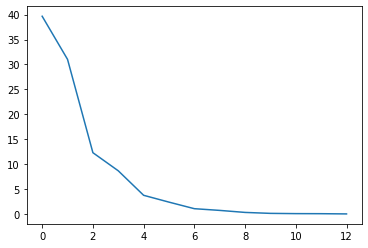

In [48]:
plt.plot(var_exp)

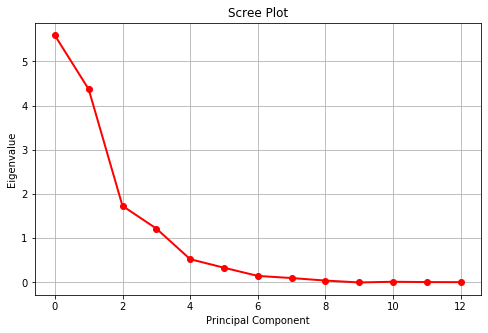

In [49]:
fig = plt.figure(figsize=(8,5))
sing_vals = range(df_z.shape[1])
plt.plot(sing_vals, eig_vals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [59]:
df_comp = pd.DataFrame(pca.components_,columns=list(df_z))
df_comp

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,0.146983,-0.283065,0.215493,-0.143846,-0.344129,0.161828,-0.424506,0.193998,0.363657,-0.163757,-0.330088,-0.313258,-0.320212
1,0.279393,0.191464,-0.343630,0.300226,-0.280714,-0.348994,-0.003579,-0.371815,-0.177770,0.262977,-0.278347,-0.323227,-0.235575
2,-0.335984,-0.349118,0.221336,0.556697,0.018911,0.024555,-0.077540,0.204452,-0.010847,0.580431,0.068273,0.017636,-0.124771
3,-0.329316,-0.340623,-0.318256,-0.120137,0.169018,-0.349548,-0.076591,-0.361976,0.368020,-0.136564,0.200979,0.179558,-0.381368
4,0.683967,-0.441426,-0.214838,0.042495,0.211787,0.327756,-0.044503,-0.067643,-0.129027,0.110920,0.188888,0.225743,-0.122260
5,-0.377613,0.154433,-0.316133,0.024795,-0.109221,0.771222,0.021747,-0.274367,-0.076388,0.008982,-0.075481,-0.043744,-0.192392
6,-0.032096,-0.178741,0.445982,-0.135284,-0.037489,-0.031528,0.516099,-0.138602,-0.367747,-0.129733,-0.251848,0.146190,-0.474325
7,0.027395,0.240444,0.325784,-0.073924,-0.084983,-0.006761,-0.363334,-0.166317,-0.287056,-0.021741,0.673820,-0.197660,-0.294819
8,-0.015125,0.054426,0.092394,0.578457,0.394615,0.001680,-0.298062,-0.082381,-0.155549,-0.573767,-0.216739,0.035744,-0.025512
9,0.039493,0.327279,0.137302,-0.307162,0.612865,0.016020,-0.256254,-0.051787,0.078873,0.418185,-0.325589,0.041574,-0.212331


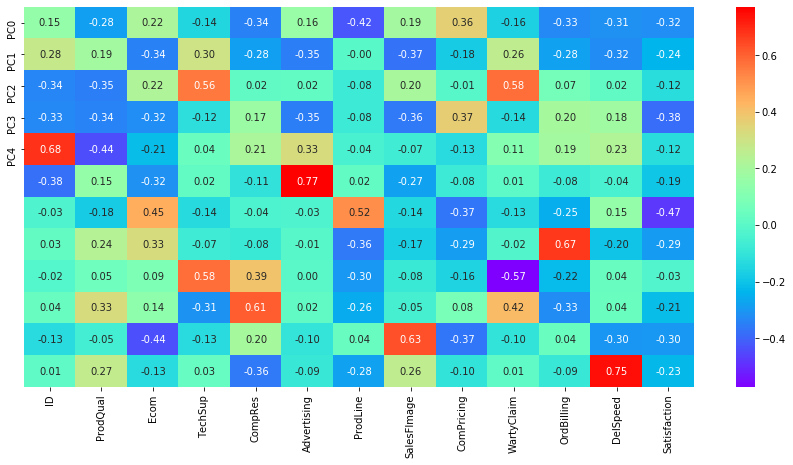

In [60]:
plt.figure(figsize= (15,7))
sns.heatmap(df_comp, cmap= 'rainbow', annot = True, fmt = '.2f', yticklabels= ['PC0', 'PC1', 'PC2', 'PC3','PC4'])
plt.show()

## Mention the business implication of using the Principal Component Analysis for this case study. [Hint: Write Interpretations of the Principal Components Obtained]


#### This business case study is about hair saloon dataset which contain the names of various colleges, which has various details of  saloon. To understand more about the dataset we perform univariate analysis and multivariate analysis which gives us the understanding about the variables. From analysis we can understand the distribution of the dataset, skew, and patterns in the dataset. From multivariate analysis we can understand the correlation of variables. Inference of multivariate analysis shows we can understand multiple variables highly correlated with each other. The scaling helps the dataset to standardize the variable in one scale. Outliers are imputed using IQR values once the values are imputed we can perform PCA. The principal component analysis is used reduce the multicollinearity between the variables. Depending on the variance of the dataset we can reduce the PCA components. The PCA components for this business case is 5 where we could understand the maximum variance of the dataset. Using the components we can now understand the reduced multicollinearity in the dataset

# clustering

In [68]:
df=pd.read_csv('State_wise_Health_income.csv')

### Part 2: Clustering: Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc)

In [66]:
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
States,Bachevo,Balgarchevo,Belasitsa,Belo_Pole,Beslen
Health_indeces1,417,1485,654,192,43
Health_indices2,66,646,299,25,8
Per_capita_income,564,2710,1104,573,528
GDP,1823,73662,27318,250,22


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [69]:
df.dtypes

Unnamed: 0            int64
States               object
Health_indeces1       int64
Health_indices2       int64
Per_capita_income     int64
GDP                   int64
dtype: object

In [70]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,297.0,148.000000,85.880731,0.0,74.0,148.0,222.0,296.0
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


In [71]:
df.duplicated().sum()

0

In [73]:
df.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [74]:
df.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


## Do you think scaling is necessary for clustering in this case? Justify.

### In most cases yes. But the answer is mainly based on the similarity/dissimilarity function you used in k-means. If the similarity measurement will not be influenced by the scale of your attributes, it is not necessary to do the scaling job.